<a href="https://colab.research.google.com/github/anaC-Fernandes/ProjetoDados/blob/main/Notebooks/Dataset_Economia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Bibliotecas

*   **pandas:** Manipulação e análise de dados.
*   **numpy:** Cálculo numérico com arrays e matrizes.
*   **matplotlib.pyplot:** Criação de gráficos.
*   **seaborn:** Visualização estatística baseada no Matplotlib.





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings




---



### Explicação das linhas de comando a seguir
Leitura de um arquivo CSV hospedado no GitHub e armazenamento dos dados em um DataFrame chamado "df" usando a biblioteca "pandas".
O separador de colunas é definido como ponto e virgula ";" e o parâmetro "low_memory=False" garante uma leitura mais precisa dos tipos de dados.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anaC-Fernandes/ProjetoDados/refs/heads/main/Datasets/BrStats.csv', sep = ";", low_memory=False)
df

,Ano,CDMunicipio,Populacao,PessoalOcupado,PessoalAssalariado,VrSalarios,PIB,QtEmpresas,AreaPlantada_h,AreaColhida_h,...,Exportacoes_US$,Receitas_R$,Transferencias_correntes_R$,Transferencias_capital_R$,NrNascimentos,NrObitosInfantis,povoamento,UF,Municipio,Regiao
0,2016,3509452,5.932,854,537,13.692,111.190,252.0,38.0,38.0,...,NaN,"25.511.889,220","18.911.068,400","1.665.392,540",80.0,0.0,"32,065",SP,Campina do Monte Alegre,Sudeste
1,2016,3123601,27.505,5.680,4.778,104.977,554.663,671.0,3.0,3.0,...,"1.777.256,000","63.002.672,933","45.304.154,440","538.882,600",299.0,3.0,"55,065",MG,Elói Mendes,Sudeste
2,2016,3552007,6.193,668,580,12.519,62.441,83.0,0.0,0.0,...,NaN,"30.492.825,449","21.861.157,950","1.048.458,040",59.0,2.0,"14,930",SP,Silveiras,Sudeste
3,2016,3305604,21.279,3.087,2.669,80.161,403.121,290.0,0.0,0.0,...,NaN,"140.538.926,872","100.508.822,360","871.234,340",272.0,2.0,"22,698",RJ,Silva Jardim,Sudeste
4,2016,1717008,4.534,212,183,5.309,48.551,34.0,94.0,34.0,...,NaN,"15.541.375,953","13.178.989,760","8.037,870",43.0,1.0,"2,908",TO,Pindorama do Tocantins,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33415,2021,2705408,7.171,463,436,10.502,NaN,32.0,0.0,0.0,...,NaN,NaN,NaN,NaN,135.0,3.0,"83,287",AL,Monteirópolis,Nordeste
33416,2021,1600105,9.265,428,383,9.932,NaN,38.0,0.0,0.0,...,NaN,NaN,NaN,NaN,160.0,2.0,"1,010",AP,Amapá,Norte
33417,2019,2605459,3.061,2.210,1.773,43.093,192.775,289.0,0.0,0.0,...,NaN,NaN,NaN,NaN,32.0,1.0,"180,059",PE,Fernando de Noronha,Nordeste
33418,2020,1503002,7.070,538,514,12.207,63.579,32.0,0.0,0.0,...,NaN,NaN,NaN,NaN,149.0,4.0,"0,601",PA,Faro,Norte




---



### Explicação das linhas de comando a seguir
Esses comandos são fundamentais para padronizar e limpar os dados, garantindo que todos os valores estejam no formato correto para análise. Eles corrigem inconsistências, como separar casas de milhar, formatos decimais diferentes e valores ausentes representados como "nan". Essa padronização evita erros em cálculos, comparações e visualizações, além de permitir que os dados sejam tratados  de forma uniformeao longo do projeto.

In [3]:
warnings.filterwarnings("ignore")
for coluna in df.columns:
    df[coluna] = df[coluna].astype(str)  # Garante que é string
    df[coluna] = df[coluna].str.replace('.', '', regex=False)  # Remove separador de milhar
    df[coluna] = df[coluna].str.replace(',', '.', regex=False)  # Converte decimal
    df[coluna] = pd.to_numeric(df[coluna], errors='ignore')  # Converte para número, ignorando erros

for coluna in df.columns:
  df[coluna] = df[coluna].astype(str)  # Garante que é string
  df[coluna] = df[coluna].str.replace('nan', '0', regex=False)  # Converte decimal

df

,Ano,CDMunicipio,Populacao,PessoalOcupado,PessoalAssalariado,VrSalarios,PIB,QtEmpresas,AreaPlantada_h,AreaColhida_h,...,Exportacoes_US$,Receitas_R$,Transferencias_correntes_R$,Transferencias_capital_R$,NrNascimentos,NrObitosInfantis,povoamento,UF,Municipio,Regiao
0,2016,3509452,5932,854,537,13692,111190,2520,380,380,...,0,25511889.220,18911068.400,1665392.540,800,0,32.065,SP,Campina do Monte Alegre,Sudeste
1,2016,3123601,27505,5680,4778,104977,554663,6710,30,30,...,1777256.000,63002672.933,45304154.440,538882.600,2990,30,55.065,MG,Elói Mendes,Sudeste
2,2016,3552007,6193,668,580,12519,62441,830,00,00,...,0,30492825.449,21861157.950,1048458.040,590,20,14.930,SP,Silveiras,Sudeste
3,2016,3305604,21279,3087,2669,80161,403121,2900,00,00,...,0,140538926.872,100508822.360,871234.340,2720,20,22.698,RJ,Silva Jardim,Sudeste
4,2016,1717008,4534,212,183,5309,48551,340,940,340,...,0,15541375.953,13178989.760,8037.870,430,10,2.908,TO,Pindorama do Tocantins,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33415,2021,2705408,7171,463,436,10502,0,320,00,00,...,0,0,0,0,1350,30,83.287,AL,Monteirópolis,Nordeste
33416,2021,1600105,9265,428,383,9932,0,380,00,00,...,0,0,0,0,1600,20,1.010,AP,Amapá,Norte
33417,2019,2605459,3061,2210,1773,43093,192775,2890,00,00,...,0,0,0,0,320,10,180.059,PE,Fer0do de Noronha,Nordeste
33418,2020,1503002,7070,538,514,12207,63579,320,00,00,...,0,0,0,0,1490,40,0.601,PA,Faro,Norte




---



### Explicação das linhas de comando a seguir
Converção explicita dos tipos dos dados das colunas para tipos mais apropriados ao seu conteúdo. Colunas numéricas que representam contagens ou valores inteiros, como população, número de empresas ou PIB, foram convertidas para o tipo "int". Colunas que contêm valores monetários ou proporções, como receitas ou povoamento, foram convertidas para o tipo "float". Já a coluna CDMunicipio, por ser um identificadorque pode conter zeros à esquerda, foi convertido para "str". Isso assegura que os dados estejam no formato correto para análise, visualizações e operações matemáticas.

In [4]:
#Momentaniamente não utilizada
df['Ano'] = df['Ano'].astype(int)
df['CDMunicipio'] = df['CDMunicipio'].astype(str)
df['Populacao'] = df['Populacao'].astype(int)
df['PessoalOcupado'] = df['PessoalOcupado'].astype(int)
df['PessoalAssalariado'] = df['PessoalAssalariado'].astype(int)
df['VrSalarios'] = df['VrSalarios'].astype(int)
df['PIB'] = df['PIB'].astype(int)
df['QtEmpresas'] = df['QtEmpresas'].astype(int)
df['AreaPlantada_h'] = df['AreaPlantada_h'].astype(int)
df['AreaColhida_h'] = df['AreaColhida_h'].astype(int)
df['VlProducaoAgricola'] = df['VlProducaoAgricola'].astype(int)
df['VlProducaoPecuaria'] = df['VlProducaoPecuaria'].astype(int)
df['Area'] = df['Area'].astype(float)
df['Importacoes_US$'] = df['Importacoes_US$'].astype(float)
df['Exportacoes_US$'] = df['Exportacoes_US$'].astype(float)
df['Receitas_R$'] = df['Receitas_R$'].astype(float)
df['Transferencias_correntes_R$'] = df['Transferencias_correntes_R$'].astype(float)
df['Transferencias_capital_R$'] = df['Transferencias_capital_R$'].astype(float)
df['NrNascimentos'] = df['NrNascimentos'].astype(int)
df['NrObitosInfantis'] = df['NrObitosInfantis'].astype(int)
df['povoamento'] = df['povoamento'].astype(float)
df.dtypes


,0
Ano,int64
CDMunicipio,object
Populacao,int64
PessoalOcupado,int64
PessoalAssalariado,int64
VrSalarios,int64
PIB,int64
QtEmpresas,int64
AreaPlantada_h,int64
AreaColhida_h,int64




---



### Explicação das linhas de comando a seguir
Implementada com o intuito de remover colunas irrelevantes ou desnecessárias do conjunto de dados, sem causar erros. Isso contribui para manter o DataFrame mais limpo, enxuto e focado apenas nas variáveis úteis para as análises do projeto.

In [5]:
columns_to_drop = ['AreaPlantada_h', 'AreaColhida_h', 'VlProducaoAgricola', 'VlProducaoPecuaria']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]


df = df.drop(columns=existing_columns_to_drop)
df


,Ano,CDMunicipio,Populacao,PessoalOcupado,PessoalAssalariado,VrSalarios,PIB,QtEmpresas,Area,Importacoes_US$,Exportacoes_US$,Receitas_R$,Transferencias_correntes_R$,Transferencias_capital_R$,NrNascimentos,NrObitosInfantis,povoamento,UF,Municipio,Regiao
0,2016,3509452,5932,854,537,13692,111190,2520,185.0,40.0,0.0,2.551189e+07,1.891107e+07,1665392.54,800,0,32.065,SP,Campina do Monte Alegre,Sudeste
1,2016,3123601,27505,5680,4778,104977,554663,6710,499.5,60.0,1777256.0,6.300267e+07,4.530415e+07,538882.60,2990,30,55.065,MG,Elói Mendes,Sudeste
2,2016,3552007,6193,668,580,12519,62441,830,414.8,70.0,0.0,3.049283e+07,2.186116e+07,1048458.04,590,20,14.930,SP,Silveiras,Sudeste
3,2016,3305604,21279,3087,2669,80161,403121,2900,937.5,97.0,0.0,1.405389e+08,1.005088e+08,871234.34,2720,20,22.698,RJ,Silva Jardim,Sudeste
4,2016,1717008,4534,212,183,5309,48551,340,1559.1,107.0,0.0,1.554138e+07,1.317899e+07,8037.87,430,10,2.908,TO,Pindorama do Tocantins,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33415,2021,2705408,7171,463,436,10502,0,320,86.1,0.0,0.0,0.000000e+00,0.000000e+00,0.00,1350,30,83.287,AL,Monteirópolis,Nordeste
33416,2021,1600105,9265,428,383,9932,0,380,9175.9,0.0,0.0,0.000000e+00,0.000000e+00,0.00,1600,20,1.010,AP,Amapá,Norte
33417,2019,2605459,3061,2210,1773,43093,192775,2890,17.0,0.0,0.0,0.000000e+00,0.000000e+00,0.00,320,10,180.059,PE,Fer0do de Noronha,Nordeste
33418,2020,1503002,7070,538,514,12207,63579,320,11770.6,0.0,0.0,0.000000e+00,0.000000e+00,0.00,1490,40,0.601,PA,Faro,Norte





---




# Pergunta 1

> `Existe uma correlação entre a quantidade de empresas (QtEmpresas) e indicadores sociais (População, NrNascimento, NrObitosInfantis)?`



Próxima entrega:


*   Definir dados a serem comparados
*   Agrupar dados discretos (numéricos) em contínuos(agrupamentos/faixas) Fazer com ambos.
*   algoritmo (a priori)
*   get_dummies






## Quantidade de empresas e nascimenos

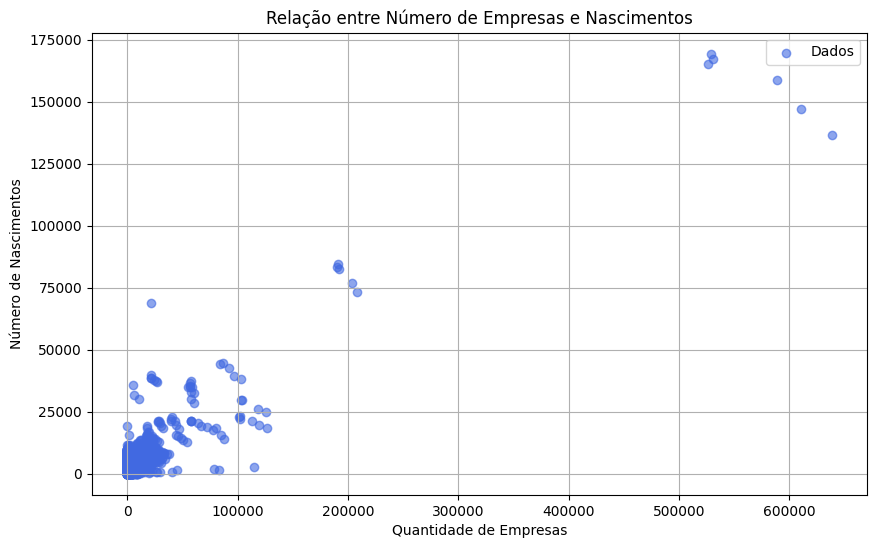

In [ ]:
df_filtrado = df[['QtEmpresas', 'NrNascimentos']].dropna().copy()
df_filtrado['QtEmpresas'] = pd.to_numeric(df_filtrado['QtEmpresas'], errors='coerce')
df_filtrado['NrNascimentos'] = pd.to_numeric(df_filtrado['NrNascimentos'], errors='coerce')
df_filtrado = df_filtrado.dropna().astype(int)

x = df_filtrado['QtEmpresas']
y = df_filtrado['NrNascimentos']


plt.figure(figsize=(10,6))
plt.scatter(x, y, color='royalblue', alpha=0.6, label="Dados")

plt.title("Relação entre Número de Empresas e Nascimentos")
plt.xlabel("Quantidade de Empresas")
plt.ylabel("Número de Nascimentos")
plt.grid(True)
plt.legend()
plt.show()

Observando o gráfico resultante da Quantidade de empresas e Número de nascimentos, podemos observar que existem 3 agrupamentos principais de dados, sendo o primeiro com o número de empresas abaixo dos 150.000, o segundo com a quantidade de empresas entre 150.000 e 300000, e por fim o com a quantidade de empresas acima dos 500.000. Com isso para aprofuindar a análise, realizaremos a contagem de quantas amostras pertencem a cada um dos grupos identificados.

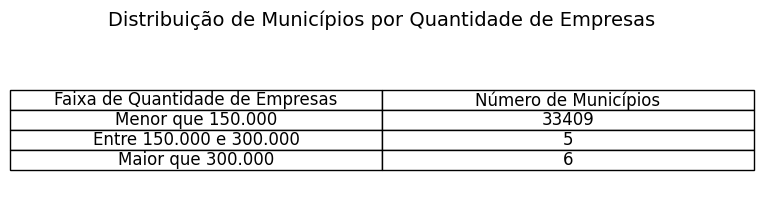

In [ ]:
menor_150k = df_filtrado[df_filtrado['QtEmpresas'] < 150000].shape[0]
entre_150k_300k = df_filtrado[(df_filtrado['QtEmpresas'] >= 150000) & (df_filtrado['QtEmpresas'] <= 300000)].shape[0]
maior_300k = df_filtrado[df_filtrado['QtEmpresas'] > 300000].shape[0]

tabela_empresas = pd.DataFrame({
    'Faixa de Quantidade de Empresas': [
        'Menor que 150.000',
        'Entre 150.000 e 300.000',
        'Maior que 300.000'
    ],
    'Número de Municípios': [
        menor_150k,
        entre_150k_300k,
        maior_300k
    ]
})


fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')


tabela = ax.table(
    cellText=tabela_empresas.values,
    colLabels=tabela_empresas.columns,
    cellLoc='center',
    loc='center'
)

tabela.auto_set_font_size(False)
tabela.set_fontsize(12)
tabela.scale(1.2, 1.2)

plt.title('Distribuição de Municípios por Quantidade de Empresas', fontsize=14, pad=20)
plt.show()

Após realizarmos a contagem da população de cada subgrupo, resultando em 33.409 para o primeiro, 5 para o segundo e 6 para o terceiro, fica evidente que na verdade os últimos dois subgrupos se tratam de outliers, sendo assim necessário os desconsiderar para uma análise mais acertiva. Deste modo foi produzido uma relação em que a quantidade de empresas foi limitada a 150.000.

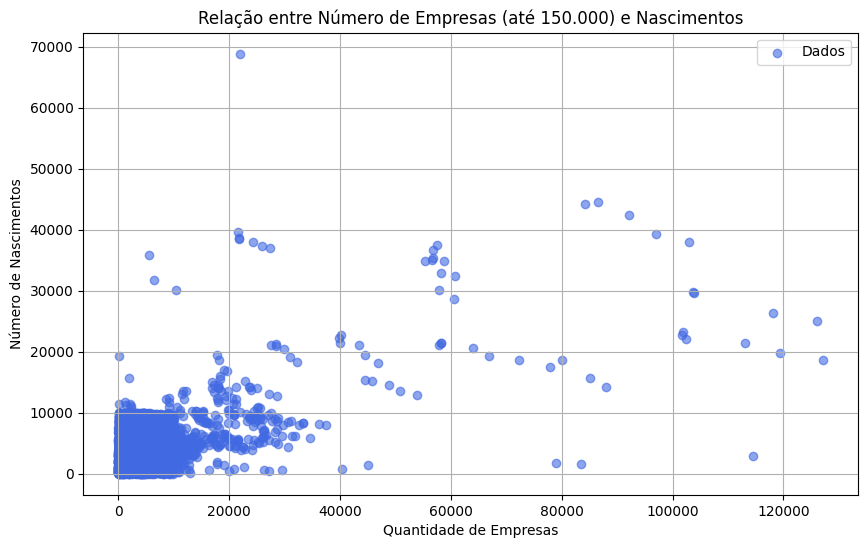

In [ ]:
df_filtrado = df[['QtEmpresas', 'NrNascimentos']].dropna().copy()
df_filtrado['QtEmpresas'] = pd.to_numeric(df_filtrado['QtEmpresas'], errors='coerce')
df_filtrado['NrNascimentos'] = pd.to_numeric(df_filtrado['NrNascimentos'], errors='coerce')
df_filtrado = df_filtrado.dropna().astype(int)

# Aplicar filtro: apenas empresas entre 0 e 150000
df_filtrado = df_filtrado[(df_filtrado['QtEmpresas'] >= 0) & (df_filtrado['QtEmpresas'] <= 150000)]

x = df_filtrado['QtEmpresas']
y = df_filtrado['NrNascimentos']

plt.figure(figsize=(10,6))
plt.scatter(x, y, color='royalblue', alpha=0.6, label="Dados")

plt.title("Relação entre Número de Empresas (até 150.000) e Nascimentos")
plt.xlabel("Quantidade de Empresas")
plt.ylabel("Número de Nascimentos")
plt.grid(True)
plt.legend()
plt.show()

Após a exclusão dos outliers, podemos observar que a disperção que antes parecia de certa forma crescente, na verdade em sua maioria é irregular, dando a concluir que não existe uma correlação entre os fatores.

## Quantidade de empresas e população

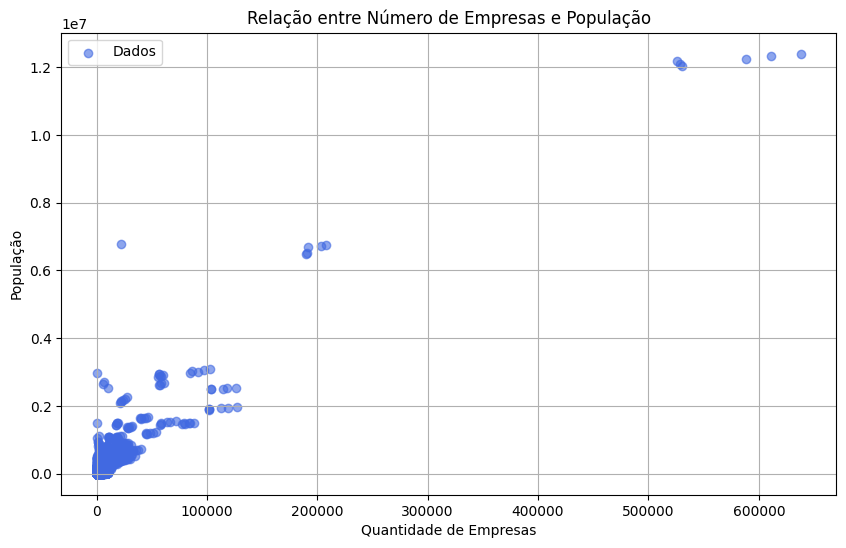

In [ ]:

df_filtrado = df[['QtEmpresas', 'Populacao']].dropna().copy()
df_filtrado['QtEmpresas'] = pd.to_numeric(df_filtrado['QtEmpresas'], errors='coerce')
df_filtrado['Populacao'] = pd.to_numeric(df_filtrado['Populacao'], errors='coerce')
df_filtrado = df_filtrado.dropna().astype(int)

x = df_filtrado['QtEmpresas']
y = df_filtrado['Populacao']

plt.figure(figsize=(10,6))
plt.scatter(x, y, color='royalblue', alpha=0.6, label="Dados")

plt.title("Relação entre Número de Empresas e População")
plt.xlabel("Quantidade de Empresas")
plt.ylabel("População")
plt.grid(True)
plt.legend()
plt.show()


De memo modo como observado anteriormente, observou-se uma subdivisão dos dados em 3 partes de tamanho igual a do gráfico anterior, o que resulta em uma mesma distribuição da população, sendo ela 33409, 5 e 6. Assim desconsideraremos os dois últimos grupos e faremos uma análise apenas do primeiro.


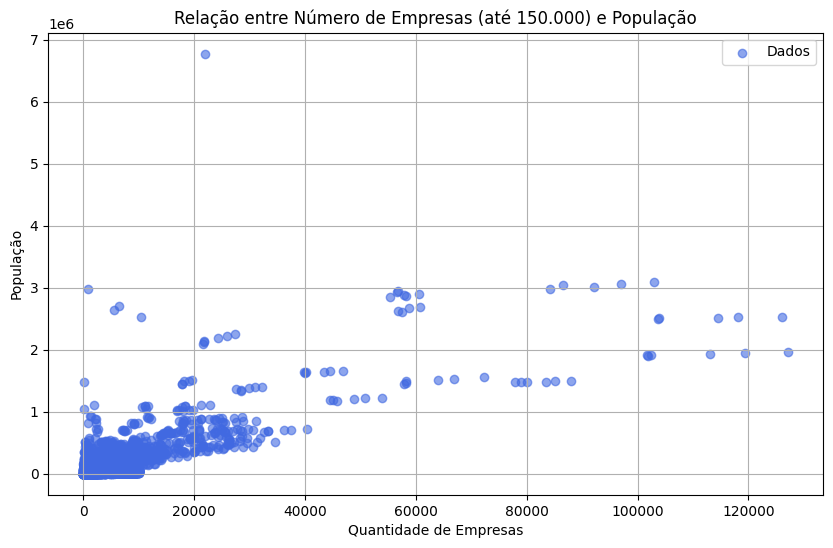

In [ ]:
df_filtrado = df[['QtEmpresas', 'Populacao']].dropna().copy()
df_filtrado['QtEmpresas'] = pd.to_numeric(df_filtrado['QtEmpresas'], errors='coerce')
df_filtrado['Populacao'] = pd.to_numeric(df_filtrado['Populacao'], errors='coerce')
df_filtrado = df_filtrado.dropna().astype(int)

# Aplicar filtro: apenas empresas entre 0 e 150000
df_filtrado = df_filtrado[(df_filtrado['QtEmpresas'] >= 0) & (df_filtrado['QtEmpresas'] <= 150000)]

x = df_filtrado['QtEmpresas']
y = df_filtrado['Populacao']

plt.figure(figsize=(10,6))
plt.scatter(x, y, color='royalblue', alpha=0.6, label="Dados")

plt.title("Relação entre Número de Empresas (até 150.000) e População")
plt.xlabel("Quantidade de Empresas")
plt.ylabel("População")
plt.grid(True)
plt.legend()
plt.show()

Ao realizarmos uma análise do primeiro grupo do gráfico: "Relação entre Número de Empresas (até 150.000) e População", é possível observar um leve aumento no limite inferior da popuçaão com o aumento da quantidade de empresas. Contudo para uma conclçusão mais precisa seria necessário realizar algumas contas para investigar este real aumento. Assim, não é possível obter uma conclusão no momento.

## Quantidade de empresas e Número de Óbitos infantís

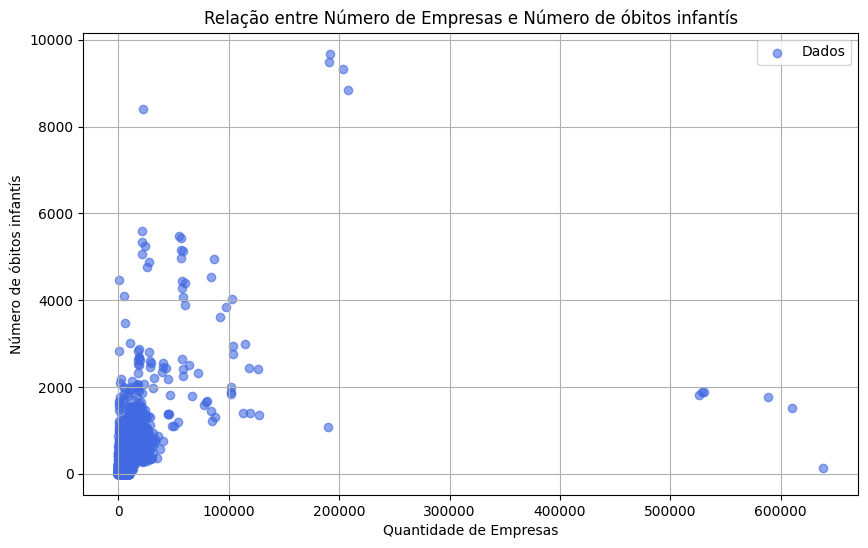

In [ ]:

df_filtrado = df[['QtEmpresas', 'NrObitosInfantis']].dropna().copy()
df_filtrado['QtEmpresas'] = pd.to_numeric(df_filtrado['QtEmpresas'], errors='coerce')
df_filtrado['NrObitosInfantis'] = pd.to_numeric(df_filtrado['NrObitosInfantis'], errors='coerce')
df_filtrado = df_filtrado.dropna().astype(int)

x = df_filtrado['QtEmpresas']
y = df_filtrado['NrObitosInfantis']

plt.figure(figsize=(10,6))
plt.scatter(x, y, color='royalblue', alpha=0.6, label="Dados")

plt.title("Relação entre Número de Empresas e Número de óbitos infantís")
plt.xlabel("Quantidade de Empresas")
plt.ylabel("Número de óbitos infantís")
plt.grid(True)
plt.legend()
plt.show()

Ao analisarmos este gráfico, fica evidente a ausência de uma relação entre os dados, uma vez que existem valores com quantidade de empresas próximos e numero de óbitos infantís extremamente divergente.

Após observarmos os resultados obtidos, cogitamos na possibilidade de que na verdade o número de nascimento e o número de óbitos poderiam estar mais intimamente relacionados com a população do que com a quantidade de empresas. Assim foi produzido mais dois gráficos.

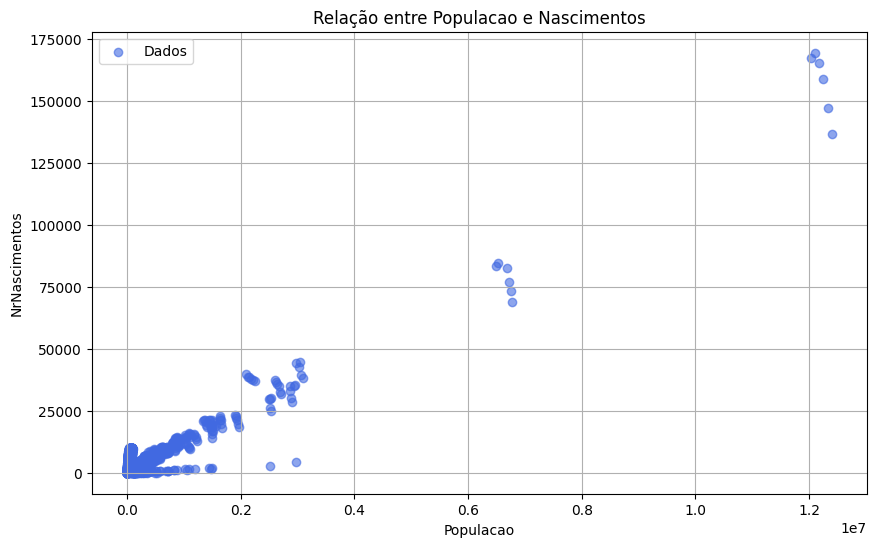

In [ ]:
df_filtrado = df[['NrNascimentos', 'Populacao']].dropna().copy()
df_filtrado['NrNascimentos'] = pd.to_numeric(df_filtrado['NrNascimentos'], errors='coerce')
df_filtrado['Populacao'] = pd.to_numeric(df_filtrado['Populacao'], errors='coerce')
df_filtrado = df_filtrado.dropna().astype(int)

x = df_filtrado['Populacao']
y = df_filtrado['NrNascimentos']

plt.figure(figsize=(10,6))
plt.scatter(x, y, color='royalblue', alpha=0.6, label="Dados")

plt.title("Relação entre Populacao e Nascimentos")
plt.xlabel("Populacao")
plt.ylabel("NrNascimentos")
plt.grid(True)
plt.legend()
plt.show()


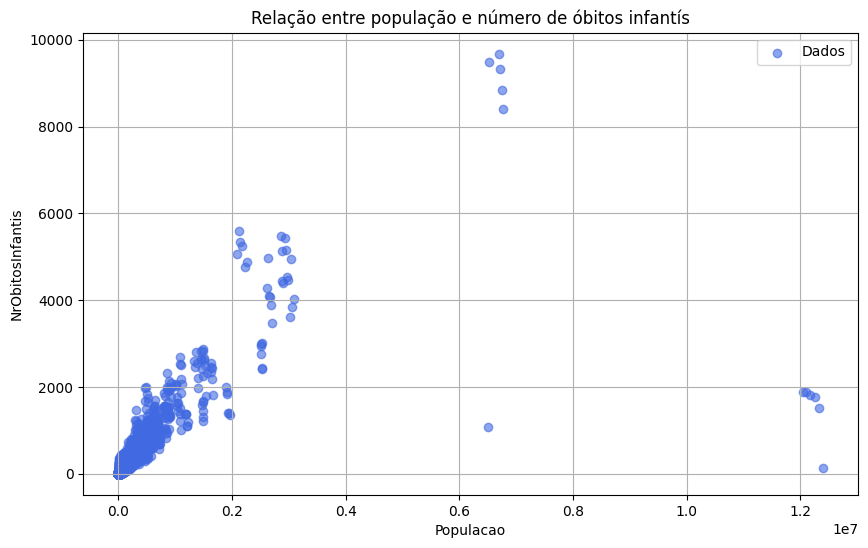

In [ ]:

df_filtrado = df[['NrObitosInfantis', 'Populacao']].dropna().copy()
df_filtrado['NrObitosInfantis'] = pd.to_numeric(df_filtrado['NrObitosInfantis'], errors='coerce')
df_filtrado['Populacao'] = pd.to_numeric(df_filtrado['Populacao'], errors='coerce')
df_filtrado = df_filtrado.dropna().astype(int)

x = df_filtrado['Populacao']
y = df_filtrado['NrObitosInfantis']

plt.figure(figsize=(10,6))
plt.scatter(x, y, color='royalblue', alpha=0.6, label="Dados")

plt.title("Relação entre população e número de óbitos infantís")
plt.xlabel("Populacao")
plt.ylabel("NrObitosInfantis")
plt.grid(True)
plt.legend()

## Análise Final:
Com uma investigação dos dados, foi evidente a inexistencia de uma relação da quantidade de empresas em um município e fatores sociais, uma vez que se retirarmos ous outliears, os valores se encontram muito dispersos. Contudo após a obtenção dos resultados da análise principal, constatamos que possívelmente o número de óbitos infantís e o número de nascimentos poderiam esta relacionados não com a quantidade de empresas e sim com a população, o que a priori, mostra-se em grande parte verdade.



---



# Pergunta 2

> `Existe alguma relação entre o Produto Interno Bruto (PIB) e a taxa de exportação (Exportacoes_US$) dos municípios?`



## Gráfico Municípios

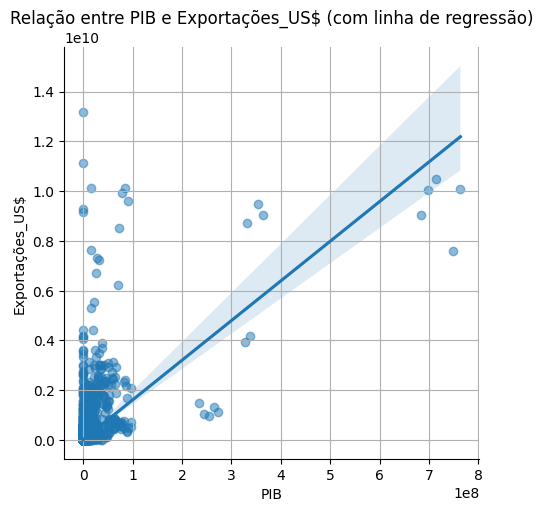

In [6]:

df_filtrado = df[['PIB', 'Exportacoes_US$']].dropna().copy()
df_filtrado['PIB'] = pd.to_numeric(df_filtrado['PIB'], errors='coerce')
df_filtrado['Exportacoes_US$'] = pd.to_numeric(df_filtrado['Exportacoes_US$'], errors='coerce')
df_filtrado = df_filtrado.dropna().astype(int)

x = df_filtrado['PIB']
y = df_filtrado['Exportacoes_US$']

sns.lmplot(x='PIB', y='Exportacoes_US$', data=df_filtrado, scatter_kws={'alpha':0.5})
plt.title('Relação entre PIB e Exportações_US$ (com linha de regressão)')
plt.xlabel('PIB')
plt.ylabel('Exportações_US$')
plt.grid(True)
plt.show()

## Análise:
A análise do gráfico de dispersão com linha de regressão permite concluir que existe, sim, uma relação positiva entre Produto Interno Bruto (PIB) e as exportações dos municípios. Observa-se que, de maneira geral, a medida que o PIB aumenta, o valor das exportações também tende a crescer, evidenciado pela inclinação positiva da linha de tendência. No entanto, essa relação não parece ser forte nem uniforme, uma vez que há uma grande dispersão de pontos, especialmente entre os municípios com PIB mais baixo, onde as exportações variam bastante. Apesar disso, a linha de regressão indica que municípios com maior PIB tem uma tendência média de apresentar exportações mais elevadas. Portanto, com esssa primeira análise gráfica, pode-se afirmar que existe uma correlação positiva entre PIB e exportações, embora ela seja fraca e sujeita a muitas variações individuais entre os municípios.
(Essa reta é chamada de linha de regressão linear, ela representa a tendência média da relação entre PIB e Exportações dos municípios.
A faixa azul clara em volta da reta é o intervalo de confiança, mostrando a incerteza da predição.
)


## Gráficos Regiões

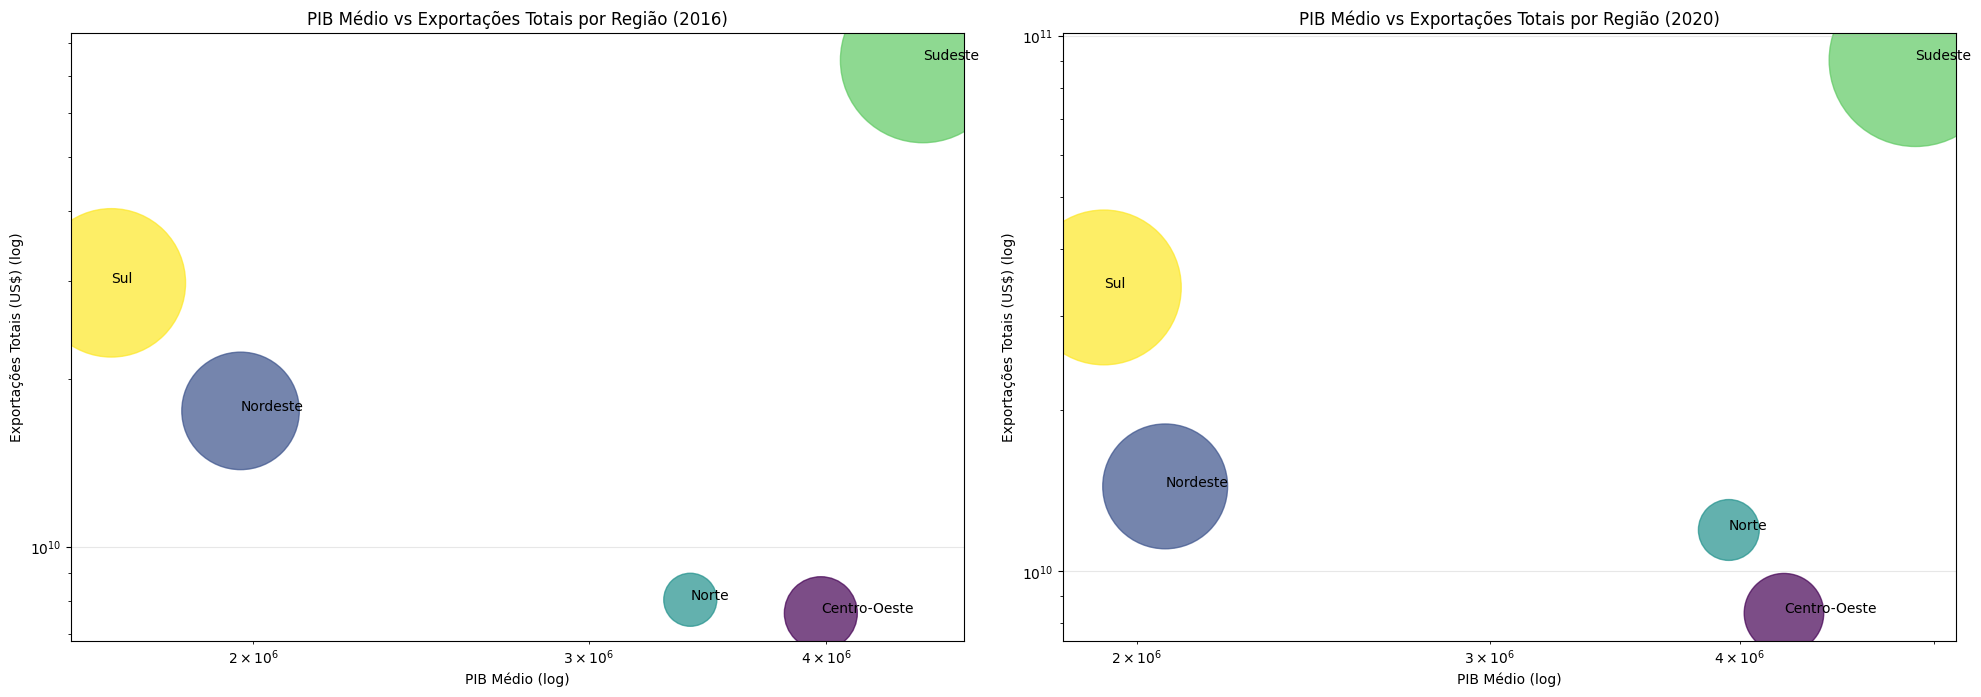

In [ ]:
plt.figure(figsize=(20, 20))

# Gráfico de bolhas para 2016
plt.subplot(3, 2, 1)
df_2016 = df_export[(df_export['Ano'] == 2016) &
                    (df_export['Exportacoes_US$'] > 0) &
                    (df_export['PIB'] > 0)]

# Agrupando por região e calculando média de PIB, soma de exportações e contagem de municípios
regioes_2016 = df_2016.groupby('Regiao').agg({
    'PIB': 'mean',
    'Exportacoes_US$': 'sum',
    'Municipio': 'count'  # Assumindo que existe uma coluna 'Municipio'
}).reset_index()

# Criando gráfico de bolhas
plt.scatter(regioes_2016['PIB'], regioes_2016['Exportacoes_US$'],
           s=regioes_2016['Municipio']*20,  # Tamanho proporcional ao número de municípios
           alpha=0.7,
           c=range(len(regioes_2016)),  # Cores diferentes por região
           cmap='viridis')

# Adicionando rótulos para cada região
for i, row in regioes_2016.iterrows():
    plt.annotate(row['Regiao'],
                (row['PIB'], row['Exportacoes_US$']),
                fontsize=10)

plt.xscale('log')
plt.yscale('log')
plt.title('PIB Médio vs Exportações Totais por Região (2016)')
plt.xlabel('PIB Médio (log)')
plt.ylabel('Exportações Totais (US$) (log)')
plt.grid(True, alpha=0.3)

# Gráfico de bolhas para 2020
plt.subplot(3, 2, 2)
df_2020 = df_export[(df_export['Ano'] == 2020) &
                    (df_export['Exportacoes_US$'] > 0) &
                    (df_export['PIB'] > 0)]

# Agrupando por região e calculando média de PIB, soma de exportações e contagem de municípios
regioes_2020 = df_2020.groupby('Regiao').agg({
    'PIB': 'mean',
    'Exportacoes_US$': 'sum',
    'Municipio': 'count'  # Assumindo que existe uma coluna 'Municipio'
}).reset_index()

# Criando gráfico de bolhas
plt.scatter(regioes_2020['PIB'], regioes_2020['Exportacoes_US$'],
           s=regioes_2020['Municipio']*20,  # Tamanho proporcional ao número de municípios
           alpha=0.7,
           c=range(len(regioes_2020)),  # Cores diferentes por região
           cmap='viridis')

# Adicionando rótulos para cada região
for i, row in regioes_2020.iterrows():
    plt.annotate(row['Regiao'],
                (row['PIB'], row['Exportacoes_US$']),
                fontsize=10)

plt.xscale('log')
plt.yscale('log')
plt.title('PIB Médio vs Exportações Totais por Região (2020)')
plt.xlabel('PIB Médio (log)')
plt.ylabel('Exportações Totais (US$) (log)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Análise
Ao analisar os gráficos comparativos entre o PIB médio e as exportações totais por região nos anos de 2016 e 2020, observa-se uma possível correlação entre o crescimento do PIB e o aumento das exportações, especialmente na região Norte, que apresentou evolução significativa em ambos os indicadores. Isso sugere que, em alguns contextos regionais, o aumento das exportações pode estar associado ao crescimento econômico local. No entanto, essa relação não é uniforme entre as regiões: o Centro-Oeste, por exemplo, manteve um PIB médio elevado, mas com menor volume de exportações, o que indica que sua economia pode estar mais voltada ao mercado interno ou a setores que não se refletem diretamente em exportações. Já o Sudeste, com o maior PIB médio e volume de exportações, reforça a ideia de que municípios com maior atividade exportadora tendem a ter maior geração de riqueza. Assim, pode-se concluir que existe uma relação entre o PIB e a taxa de exportação em muitos municípios, embora fatores como estrutura econômica e perfil produtivo regional também influenciem essa dinâmica.

## Inferência Estatística

In [ ]:
# Remove municípios com PIB ou Exportações iguais a zero
df_filtrado = df[(df['PIB'] > 0) & (df['Exportacoes_US$'] > 0)]

In [ ]:
# Cria categorias de PIB com base em tercis
df_filtrado['PIB_grupo'] = pd.qcut(df_filtrado['PIB'], q=3, labels=['Baixo', 'Médio', 'Alto'])

In [ ]:
from scipy.stats import levene

grupo_baixo = df_filtrado[df_filtrado['PIB_grupo'] == 'Baixo']['Exportacoes_US$']
grupo_medio = df_filtrado[df_filtrado['PIB_grupo'] == 'Médio']['Exportacoes_US$']
grupo_alto = df_filtrado[df_filtrado['PIB_grupo'] == 'Alto']['Exportacoes_US$']

stat_levene, p_levene = levene(grupo_baixo, grupo_medio, grupo_alto)
print(f'Teste de Levene - p-valor: {p_levene:.4f}')

Teste de Levene - p-valor: 0.0000


In [ ]:
from scipy.stats import kruskal

h_stat, p_kruskal = kruskal(grupo_baixo, grupo_medio, grupo_alto)
print(f'Teste de Kruskal-Wallis - p-valor: {p_kruskal:.4f}')

Teste de Kruskal-Wallis - p-valor: 0.0000


## Regra de Associação

### Explicação das linhas de código a seguir:
Neste trecho de código, foi criada uma nova base (df_apriori) contendo apenas os municípios com valores positivos de PIB e exportações, excluindo também eventuais dados ausentes nessas colunas. Em seguida, o PIB e as exportações foram categorizados em três faixas (baixo, médio e alto) com base em tercis, ou seja, cada categoria contém aproximadamente um terço dos municípios. Isso permite transformar os dados contínuos em dados categóricos, facilitando a aplicação de algoritmos de regras de associação como o Apriori.

In [25]:
# Filtra os municípios com PIB e exportações maiores que zero
dados_filtrados = df[(df['PIB'] > 0) & (df['Exportacoes_US$'] > 0)].copy()

# Remove valores ausentes nas colunas de interesse
dados_filtrados = dados_filtrados.dropna(subset=['PIB', 'Exportacoes_US$'])

# Classifica o PIB e as exportações em três faixas: baixo, médio e alto (tercis)
dados_filtrados['Faixa_PIB'] = pd.qcut(dados_filtrados['PIB'], q=3, labels=["PIB_baixo", "PIB_medio", "PIB_alto"])
dados_filtrados['Faixa_Exportacoes'] = pd.qcut(dados_filtrados['Exportacoes_US$'], q=3, labels=["EXP_baixo", "EXP_medio", "EXP_alto"])

### Explicação das linhas de código a seguir:
DataFrame df_apriori, que contém as categorias de PIB e exportações, foi transformado em um novo DataFrame chamado df_transacoes utilizando a função pd.get_dummies(). Essa função converte as categorias (como "PIB_alto" ou "EXP_baixo") em colunas binárias (0 ou 1), indicando a presença ou ausência de cada categoria em cada linha. O resultado é uma matriz no formato adequado para aplicar algoritmos de mineração de padrões, como o Apriori, que exigem dados transacionais com atributos binários.

In [23]:
# Converte as categorias para o formato de variáveis binárias (0 ou 1)
dados_binarios = pd.get_dummies(dados_filtrados[['Faixa_PIB', 'Faixa_Exportacoes']])
dados_binarios

,Faixa_PIB_PIB_baixo,Faixa_PIB_PIB_medio,Faixa_PIB_PIB_alto,Faixa_Exportacoes_EXP_baixo,Faixa_Exportacoes_EXP_medio,Faixa_Exportacoes_EXP_alto
1,False,True,False,False,True,False
6,True,False,False,True,False,False
10,False,False,True,False,True,False
15,False,True,False,True,False,False
16,False,True,False,True,False,False
...,...,...,...,...,...,...
15529,True,False,False,True,False,False
15530,True,False,False,False,True,False
15531,True,False,False,False,True,False
15532,False,True,False,True,False,False


### Explicação das linhas de código a seguir:
Neste trecho, foi aplicado o algoritmo Apriori sobre os dados binários para identificar conjuntos frequentes de categorias de PIB e exportações, considerando apenas aqueles que ocorrem em pelo menos 10% dos municípios (min_support=0.1). Com esses conjuntos, são geradas regras de associação com confiança mínima de 60%, ou seja, regras em que a ocorrência do antecedente implica no consequente com pelo menos 60% de probabilidade. Em seguida, as regras são ordenadas da maior para a menor confiança, e são exibidas as colunas principais.


In [24]:
from mlxtend.frequent_patterns import apriori, association_rules

# Aplica o algoritmo Apriori para encontrar combinações frequentes
conjuntos_frequentes = apriori(dados_binarios, min_support=0.1, use_colnames=True)

# Gera regras de associação com base nos conjuntos frequentes
regras_associacao = association_rules(conjuntos_frequentes, metric="confidence", min_threshold=0.6) #limiar mínimo de confiança de 60%

# Ordena as regras por confiança (do maior para o menor)
regras_associacao.sort_values(by="confidence", ascending=False, inplace=True)

# Exibe as principais colunas das regras encontradas
regras_associacao[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
3,(Faixa_Exportacoes_EXP_alto),(Faixa_PIB_PIB_alto),0.243537,0.730462,2.190935
2,(Faixa_PIB_PIB_alto),(Faixa_Exportacoes_EXP_alto),0.243537,0.730462,2.190935
1,(Faixa_Exportacoes_EXP_baixo),(Faixa_PIB_PIB_baixo),0.202298,0.606956,1.821055
0,(Faixa_PIB_PIB_baixo),(Faixa_Exportacoes_EXP_baixo),0.202298,0.606956,1.821055


## Analise dos resultados:

No resultado da execução do algoritmo Apriori, temos as seguintes colunas:

*   **antecedents (antecedente):** conjunto(s) de item(s) que antecedem a regra. Por exemplo, (Faixa_PIB_PIB_alto) significa que o município foi classificado com PIB alto.

*   **consequents (consequente):** conjunto(s) de item(s) que aparecem como consequência da regra. Ex: (Faixa_Exportacoes_EXP_alto) indica exportações altas.

*   **support (suporte):** proporção de municípios que apresentam tanto o antecedente quanto o consequente. Por exemplo, 0.243537 significa que cerca de 24,35% dos municípios têm PIB alto e exportações altas.

*   **confidence (confiança):** probabilidade condicional do consequente ocorrer, dado que o antecedente ocorreu. Por exemplo, uma confiança de 0.730462 indica que 73,05% dos municípios com PIB alto também têm exportações altas.

*   lift: mede a força da associação, comparando a regra com a aleatoriedade. Um valor acima de 1 indica que a associação é positiva.

## Conclusão:
As regras de associação revelam um padrão claro: municípios com PIB alto tendem fortemente a também possuir exportações altas, e o mesmo vale para PIB baixo e exportações baixas. Isso indica uma relação consistente entre os níveis dessas duas variáveis, reforçando que o desempenho econômico dos municípios está associado à sua capacidade exportadora. O lift superior a 2 reforça que esses padrões são significativamente mais prováveis do que ocorrências ao acaso.



---



# Pergunta 3


> `Existe uma grande discrepância entre o PIB da região mais desenvolvida do Brasil, no caso referimos ao Sudeste, com as demais regiões que compõem o país?`



## Gráfico

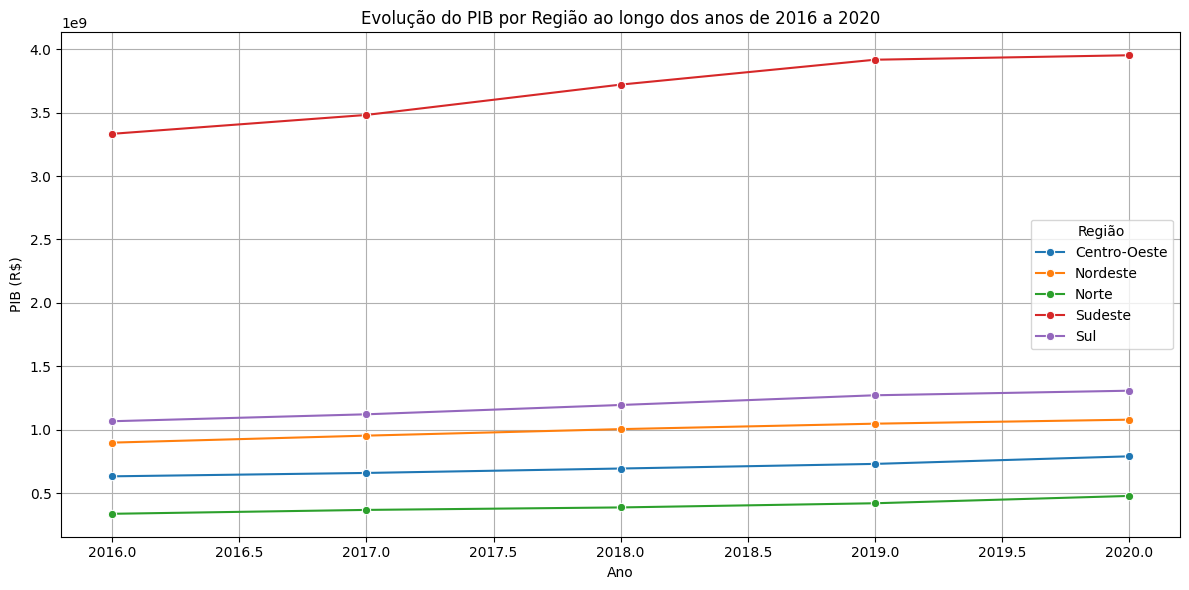

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remover o ano de 2021
df_filtrado = df[df['Ano'] != 2021]

# Agrupar os dados por Ano e Região, somando o PIB
df_agrupado = df_filtrado.groupby(['Ano', 'Regiao'])['PIB'].sum().reset_index()

# Plotar gráfico de linhas com bolinhas
plt.figure(figsize=(12,6))
sns.lineplot(data=df_agrupado, x='Ano', y='PIB', hue='Regiao', marker='o', palette='tab10')

plt.title('Evolução do PIB por Região ao longo dos anos de 2016 a 2020')
plt.xlabel('Ano')
plt.ylabel('PIB (R$)')
plt.grid(True)
plt.legend(title='Região')
plt.tight_layout()
plt.show()


## Análise:
Com base no gráfico de linhas e marcadores elaborado a partir dos dados, é possível observar uma discrepância significativa entre o PIB da região Sudeste e das demais regiões do Brasil. O Sudeste apresenta valores de PIB consistentemente mais altos ao longo dos anos, distanciando-se com clareza das regiões Sul, Nordeste, Centro-Oeste e, principalmente, Norte. Essa diferença evidencia o maior grau de desenvolvimento econômico da região Sudeste em comparação com as demais. A disparidade sugere uma concentração de atividade econômica, industrialização e investimentos nessa região.

## Inferência Estatística



---



# Pergunta 4

> `As transferências correntes (Transferencias_correntes_R$) e as transferências capitais (Transferencias_capital_R$) tem influencia nas Receitas (Receitas_R$) dos municípios?`









## Transferencias correntes e Receitas - Gráfico

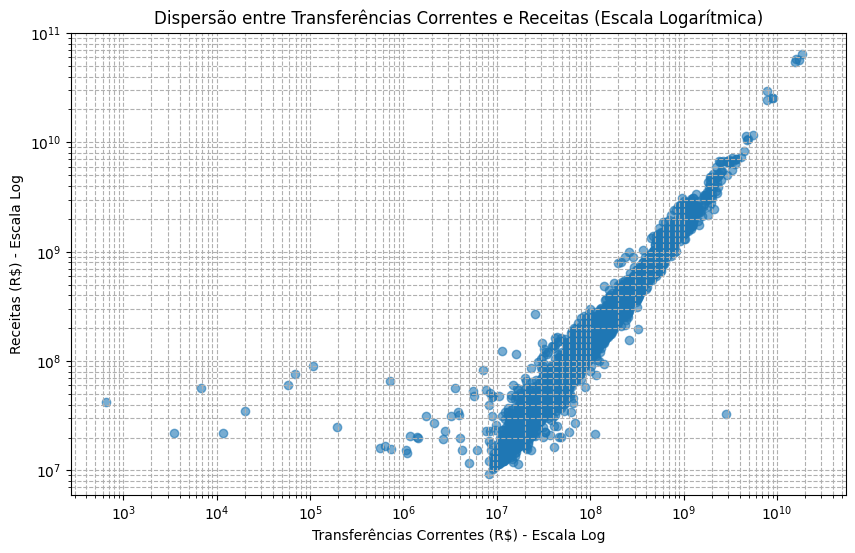

In [ ]:
import matplotlib.pyplot as plt

# Seleciona os dados que queremos
x = df['Transferencias_correntes_R$']
y = df['Receitas_R$']

# Cria o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6)
plt.xscale('log')  # Escala logarítmica no eixo X
plt.yscale('log')  # Escala logarítmica no eixo Y
plt.xlabel('Transferências Correntes (R$) - Escala Log')
plt.ylabel('Receitas (R$) - Escala Log')
plt.title('Dispersão entre Transferências Correntes e Receitas (Escala Logarítmica)')
plt.grid(True, which="both", ls="--")
plt.show()




## Análise:
O gráfico mostra uma forte tendência positiva entre Tranferência Corrente e Receitas dos municípios. A medida que as transferências correntes aumentam, as receitas municipais também aumentam de forma bastante proporcional. Apesar de alguns outliers (municípios muito acima da média), a maioria dos dados segue um padrão linear bem definido, indicando que as transferências correntes influenciam fortemente as receitas dos municípios. Esse gráfico de dispersão com escala logarítmica foi escolhido, pois melhora a visualização quando há muitos pontos no canto inferior (valores pequenos) e poucos valores muito grandes (outliers), deixando as relações mais proporcionais. (Essas são as analises preliminares e feitas a partir do gráfico acima).

## Transferencias correntes e Receitas - Inferência Estatística

## Transferencias correntes e Receitas - Regra de Associação

In [27]:
# Filtra os municípios com Transferências e Receitas maiores que zero
dados_financas = df[(df['Transferencias_correntes_R$'] > 0) & (df['Receitas_R$'] > 0)].copy()

# Remove valores ausentes
dados_financas = dados_financas.dropna(subset=['Transferencias_correntes_R$', 'Receitas_R$'])

# Classifica em tercis: baixo, médio e alto
dados_financas['Faixa_Transferencias'] = pd.qcut(dados_financas['Transferencias_correntes_R$'], q=3, labels=['TRANSF_baixa', 'TRANSF_media', 'TRANSF_alta'])
dados_financas['Faixa_Receitas'] = pd.qcut(dados_financas['Receitas_R$'], q=3, labels=['RECEITA_baixa', 'RECEITA_media', 'RECEITA_alta'])

In [35]:
# Transforma em variáveis binárias
dados_binarios_financas = pd.get_dummies(dados_financas[['Faixa_Transferencias', 'Faixa_Receitas']])
dados_binarios_financas

,Faixa_Transferencias_TRANSF_baixa,Faixa_Transferencias_TRANSF_media,Faixa_Transferencias_TRANSF_alta,Faixa_Receitas_RECEITA_baixa,Faixa_Receitas_RECEITA_media,Faixa_Receitas_RECEITA_alta
0,True,False,False,True,False,False
1,False,True,False,False,False,True
2,False,True,False,False,True,False
3,False,False,True,False,False,True
4,True,False,False,True,False,False
...,...,...,...,...,...,...
27812,False,True,False,False,False,True
27813,False,True,False,False,True,False
27814,False,False,True,False,True,False
27815,False,True,False,False,True,False


In [29]:
# Aplica Apriori para encontrar conjuntos frequentes
conjuntos_frequentes_financas = apriori(dados_binarios_financas, min_support=0.1, use_colnames=True)

# Gera regras com confiança mínima de 60%
regras_financas = association_rules(conjuntos_frequentes_financas, metric='confidence', min_threshold=0.6) #limiar mínimo de confiança de 60%

# Ordena por confiança
regras_financas.sort_values(by='confidence', ascending=False, inplace=True)

# Exibe regras principais
regras_financas[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
4,(Faixa_Transferencias_TRANSF_alta),(Faixa_Receitas_RECEITA_alta),0.314252,0.942756,2.828268
5,(Faixa_Receitas_RECEITA_alta),(Faixa_Transferencias_TRANSF_alta),0.314252,0.942756,2.828268
1,(Faixa_Transferencias_TRANSF_baixa),(Faixa_Receitas_RECEITA_baixa),0.310890,0.932670,2.798010
0,(Faixa_Receitas_RECEITA_baixa),(Faixa_Transferencias_TRANSF_baixa),0.310890,0.932670,2.798010
3,(Faixa_Receitas_RECEITA_media),(Faixa_Transferencias_TRANSF_media),0.292445,0.877334,2.632002
2,(Faixa_Transferencias_TRANSF_media),(Faixa_Receitas_RECEITA_media),0.292445,0.877334,2.632002


## Conclusão:
A análise por regras de associação revelou uma forte relação entre as Transferências Correntes recebidas pelos municípios e suas Receitas Totais. As regras com maior suporte e confiança mostram que municípios com altas transferências tendem a ter altas receitas, enquanto os que recebem poucas transferências costumam apresentar receitas baixas. Os valores de lift acima de 2,5 em todas as regras indicam que essa associação é estatisticamente relevante e muito mais frequente do que o acaso explicaria, apontando para uma forte dependência das receitas municipais em relação às transferências recebidas.

## Transferências de capital e Receitas - Gráfico



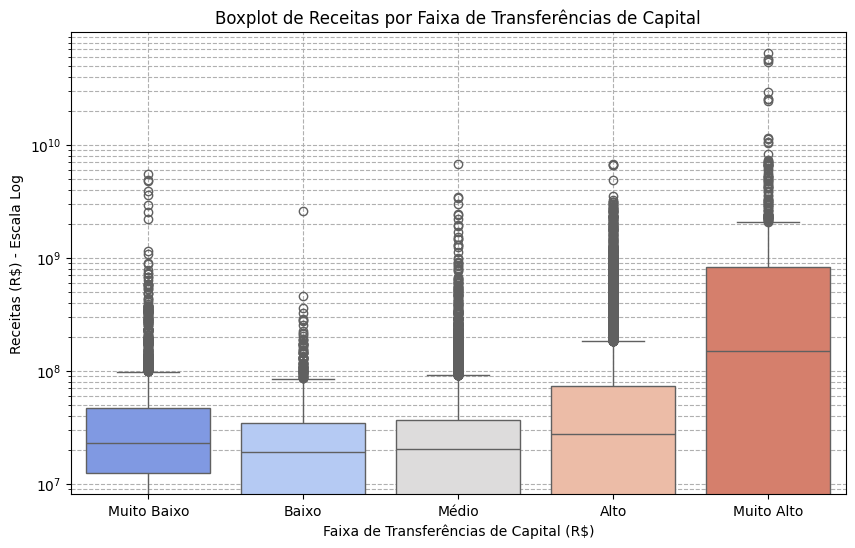

In [ ]:
# Cria faixas de Transferencias_capital_R$
df['Faixa_Transferencias_Capital'] = pd.cut(
    df['Transferencias_capital_R$'],
    bins=[-1, 10000, 100000, 1000000, 10000000, df['Transferencias_capital_R$'].max()],
    labels=['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto']
)

# Faz o Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Faixa_Transferencias_Capital', y='Receitas_R$', palette='coolwarm')
plt.yscale('log')  # Escala logarítmica no eixo Y para melhorar visualização
plt.xlabel('Faixa de Transferências de Capital (R$)')
plt.ylabel('Receitas (R$) - Escala Log')
plt.title('Boxplot de Receitas por Faixa de Transferências de Capital')
plt.grid(True, which="both", ls="--")
plt.show()

## Análise:
Há uma relação positiva entre o valor das Transferências de Capital e as Receitas. Conforme as transferências aumentam (de "Muito Baixo" para "Muito Alto"), as receitas também tendem a crescer, indicando que municípios com maiores transferências de capital geralmente possuem receitas mais elevadas. As faixas "Muito Alto" e "Alto" apresentam maior dispersão nas receitas, sugerindo que, embora essas faixas tenham valores medianos mais altos, há uma variação significativa entre os municípios dentro dessas categorias. As faixas "Nuito Baixo" e "Baixo" mostram receitas mais concentradas e menores, com pouca variação.

## Transferências de capital e Receitas - Inferência Estatística

## Transferências de capital e Receitas - Regra de Associação

In [30]:
# Filtra os municípios com Transferências de Capital e Receitas maiores que zero
dados_capital = df[(df['Transferencias_capital_R$'] > 0) & (df['Receitas_R$'] > 0)].copy()

# Remove valores ausentes (NaN)
dados_capital = dados_capital.dropna(subset=['Transferencias_capital_R$', 'Receitas_R$'])

# Classifica Transferências de Capital e Receitas em 3 faixas (tercis)
dados_capital['Faixa_TransferenciasCapital'] = pd.qcut(dados_capital['Transferencias_capital_R$'], q=3, labels=['TRANSFcap_baixa', 'TRANSFcap_media', 'TRANSFcap_alta'])
dados_capital['Faixa_Receitas'] = pd.qcut(dados_capital['Receitas_R$'], q=3, labels=['RECEITA_baixa', 'RECEITA_media', 'RECEITA_alta'])

In [36]:
# Transforma os dados categorizados em variáveis binárias
dados_binarios_capital = pd.get_dummies(dados_capital[['Faixa_TransferenciasCapital', 'Faixa_Receitas']])
dados_binarios_capital

,Faixa_TransferenciasCapital_TRANSFcap_baixa,Faixa_TransferenciasCapital_TRANSFcap_media,Faixa_TransferenciasCapital_TRANSFcap_alta,Faixa_Receitas_RECEITA_baixa,Faixa_Receitas_RECEITA_media,Faixa_Receitas_RECEITA_alta
0,False,False,True,True,False,False
1,True,False,False,False,False,True
2,False,True,False,False,True,False
3,False,True,False,False,False,True
4,True,False,False,True,False,False
...,...,...,...,...,...,...
27812,True,False,False,False,False,True
27813,False,True,False,False,True,False
27814,True,False,False,False,True,False
27815,False,False,True,False,True,False


In [34]:
# Aplica o algoritmo Apriori para encontrar padrões frequentes
conjuntos_frequentes_capital = apriori(dados_binarios_capital, min_support=0.1, use_colnames=True)

# Gera regras de associação com confiança mínima de 60%
regras_capital = association_rules(conjuntos_frequentes_capital, metric='confidence', min_threshold=0.5) #limiar mínimo de confiança de 50%

# Ordena as regras pela confiança, do maior para o menor
regras_capital.sort_values(by='confidence', ascending=False, inplace=True)

# Exibe as principais colunas do resultado
regras_capital[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
3,(Faixa_Receitas_RECEITA_alta),(Faixa_TransferenciasCapital_TRANSFcap_alta),0.206758,0.620242,1.860631
2,(Faixa_TransferenciasCapital_TRANSFcap_alta),(Faixa_Receitas_RECEITA_alta),0.206758,0.620242,1.860631
1,(Faixa_TransferenciasCapital_TRANSFcap_baixa),(Faixa_Receitas_RECEITA_baixa),0.177602,0.532779,1.598258
0,(Faixa_Receitas_RECEITA_baixa),(Faixa_TransferenciasCapital_TRANSFcap_baixa),0.177602,0.532779,1.598258


## Conclusão
A análise com regras de associação sugere que existe sim uma relação estatística entre as transferências de capital e as receitas dos municípios. Municípios que recebem maiores valores em transferências de capital tendem a apresentar receitas mais elevadas. A confiança das regras ultrapassando 60% e o lift acima de 1,5 reforçam que a associação não ocorre ao acaso, principalmente nas faixas "alta" e "baixa". Assim, é possível inferir que as transferências de capital têm influência relevante sobre a receita municipal.